In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
# Load your dataset
data = pd.read_csv(r'C:\Users\User\Downloads\updated_learner_attrition_data_2017_2024.csv')

In [8]:
# Preview the first few rows
print(data.head())

   Record_ID        Date Age_Group  Gender    Region Household_Income  \
0          1  01/01/2020     25-34    Male  Suburban             High   
1          2  04/08/2018     18-24    Male     Rural           Middle   
2          3  08/09/2017     25-34  Female     Urban             High   
3          4  08/03/2021     18-24    Male     Urban             High   
4          5  09/04/2022     25-34  Female     Urban             High   

  Access_to_Technology Employment_Status KCSE_Grade  Assessments_Submitted  \
0                   No        Unemployed          E                      8   
1                  Yes         Full-time         D-                     12   
2                   No         Full-time         B-                     12   
3                  Yes         Full-time         D-                     15   
4                  Yes         Part-time          E                     10   

   ...  Learning_Adaptability Logins_Per_Week  Time_Spent_Weekly  \
0  ...                  

In [10]:
# Check for data types and missing values
print(data.info())

# Summary statistics for numerical columns
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               30000 non-null  int64  
 1   Date                    30000 non-null  object 
 2   Age_Group               30000 non-null  object 
 3   Gender                  30000 non-null  object 
 4   Region                  30000 non-null  object 
 5   Household_Income        30000 non-null  object 
 6   Access_to_Technology    30000 non-null  object 
 7   Employment_Status       30000 non-null  object 
 8   KCSE_Grade              30000 non-null  object 
 9   Assessments_Submitted   30000 non-null  int64  
 10  Assessment_Score        30000 non-null  int64  
 11  Learning_Adaptability   30000 non-null  object 
 12  Logins_Per_Week         30000 non-null  int64  
 13  Time_Spent_Weekly       30000 non-null  int64  
 14  Forum_Participation     30000 non-null

In [12]:
# Drop irrelevant columns
data = data.drop(columns=['Record_ID', 'Date', 'Unnamed: 19', 'Unnamed: 20'])

Attrition_Status
Dropout       10059
Completion     9995
Continued      9946
Name: count, dtype: int64


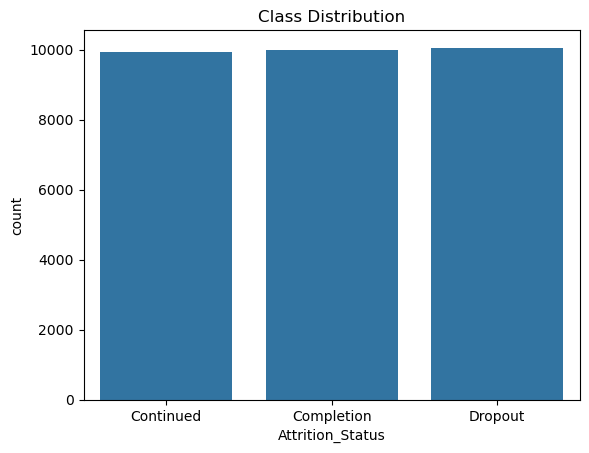

In [14]:
# Check target class distribution
print(data['Attrition_Status'].value_counts())

# Optional: Visualize class distribution
sns.countplot(data=data, x='Attrition_Status')
plt.title('Class Distribution')
plt.show()

In [66]:
#Feature Engineering
# Psychosocial Risk Indicator
data['Psychosocial_Risk'] = ((data['Psychosocial_Support'] == 'Low') & (data['Learning_Adaptability'] == 'Low')).astype(int)

data['Average_Time_Per_Login'] = data['Time_Spent_Weekly'] / (data['Logins_Per_Week'].replace(0, np.nan) + 1e-6)
data['Assessment_Efficiency'] = data['Assessment_Score'] / (data['Time_Spent_Weekly'].replace(0, np.nan) + 1e-6)
data['Academic_Engagement_Score'] = data['Assessments_Submitted'] + data["Assessment_Score"]

#Scaling to maintain Consistency
scaler = StandardScaler()
data[['Average_Time_Per_Login', 'Assessment_Efficiency','Psychosocial_Risk', 'Academic_Engagement_Score']] = scaler.fit_transform(
    data[['Average_Time_Per_Login', 'Assessment_Efficiency','Psychosocial_Risk', 'Academic_Engagement_Score']]
)

In [16]:
# Encode categorical features
label_encoder = LabelEncoder()

# List of categorical columns
categorical_cols = ['Age_Group', 'Gender', 'Region', 'Household_Income', 
                    'Access_to_Technology', 'Employment_Status', 'KCSE_Grade', 
                    'Learning_Adaptability', 'Support_Services_Usage', 
                    'Psychosocial_Support', 'Attrition_Status']

# Apply Label Encoding
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [18]:
# Select numerical columns
numerical_cols = ['Assessments_Submitted', 'Assessment_Score', 'Logins_Per_Week', 
                  'Time_Spent_Weekly', 'Forum_Participation', 'Emails_Sent_Weekly']

scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [34]:
# Split into features (X) and target (y)
X = data.drop(columns=['Attrition_Status'])
y = data['Attrition_Status']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [38]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

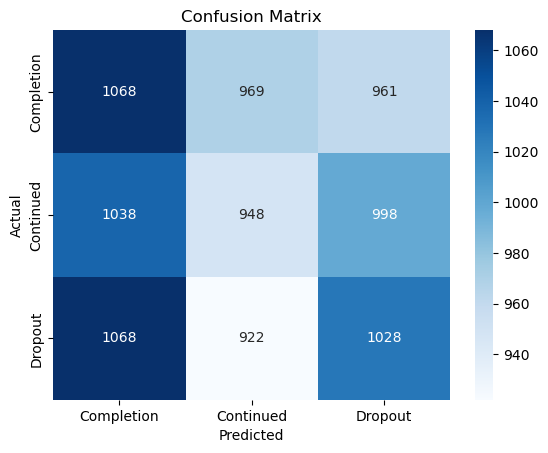

              precision    recall  f1-score   support

  Completion       0.34      0.36      0.35      2998
   Continued       0.33      0.32      0.33      2984
     Dropout       0.34      0.34      0.34      3018

    accuracy                           0.34      9000
   macro avg       0.34      0.34      0.34      9000
weighted avg       0.34      0.34      0.34      9000



In [40]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

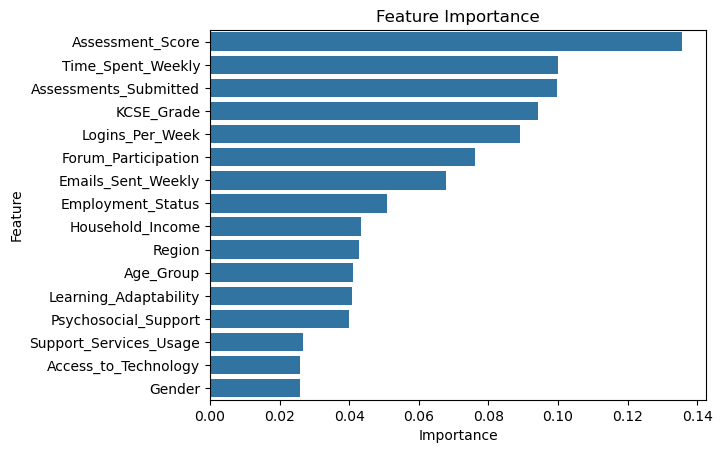

In [26]:
# Get feature importance
importances = rf_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot feature importance
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()

In [ ]:
#Testing Model Improvement Ideas.

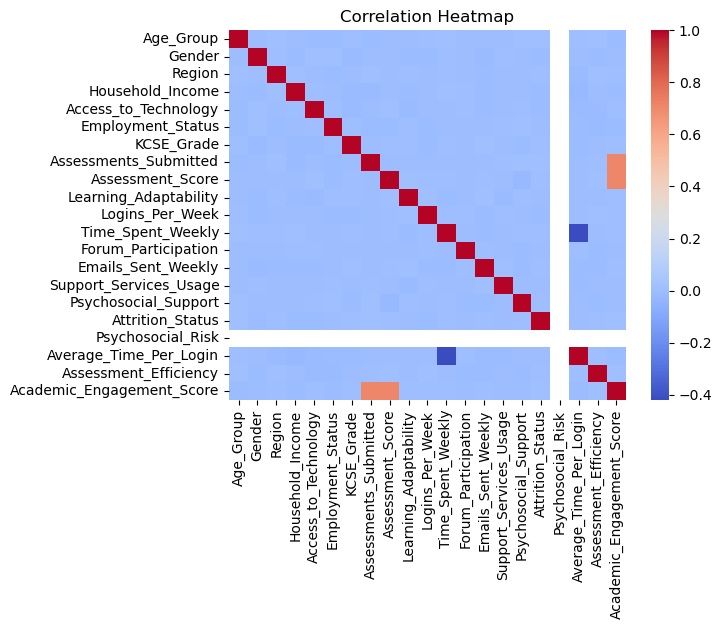

In [68]:
# Correlation heatmap
corr = data.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [42]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, scoring='f1_macro', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train model with best parameters
rf_best = grid_search.best_estimator_
y_pred_best = rf_best.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred_best, target_names=label_encoder.classes_))


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

  Completion       0.33      0.35      0.34      2998
   Continued       0.33      0.31      0.32      2984
     Dropout       0.34      0.34      0.34      3018

    accuracy                           0.33      9000
   macro avg       0.33      0.33      0.33      9000
weighted avg       0.33      0.33      0.33      9000



In [44]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

  Completion       0.34      0.35      0.34      2998
   Continued       0.33      0.32      0.32      2984
     Dropout       0.35      0.35      0.35      3018

    accuracy                           0.34      9000
   macro avg       0.34      0.34      0.34      9000
weighted avg       0.34      0.34      0.34      9000



In [50]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

print(classification_report(y_test, y_pred_mlp, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

  Completion       0.33      0.33      0.33      2998
   Continued       0.33      0.32      0.33      2984
     Dropout       0.34      0.37      0.35      3018

    accuracy                           0.34      9000
   macro avg       0.34      0.34      0.34      9000
weighted avg       0.34      0.34      0.34      9000



C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [52]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print(classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

  Completion       0.34      0.31      0.32      2998
   Continued       0.33      0.28      0.30      2984
     Dropout       0.33      0.42      0.37      3018

    accuracy                           0.33      9000
   macro avg       0.33      0.33      0.33      9000
weighted avg       0.33      0.33      0.33      9000



In [54]:
#Stacking - combine Strengths of multiple models (e.g., Random Forest, XGBoost, Logistic Regression).
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

base_learners = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42))
]
stack_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())
stack_model.fit(X_train, y_train)
y_pred_stack = stack_model.predict(X_test)

print(classification_report(y_test, y_pred_stack, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

  Completion       0.33      0.24      0.28      2998
   Continued       0.33      0.26      0.29      2984
     Dropout       0.32      0.48      0.38      3018

    accuracy                           0.33      9000
   macro avg       0.33      0.33      0.32      9000
weighted avg       0.33      0.33      0.32      9000



In [74]:
#Experiment with Neural Networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32)

ModuleNotFoundError: No module named 'tensorflow'

In [64]:
pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


In [70]:
# Compute correlation matrix
corr_matrix = data.corr()

# Display correlations with the target variable 'Attrition_Status'
target_corr = corr_matrix['Attrition_Status'].drop('Attrition_Status')
print("Correlation of each feature with Attrition_Status:")
print(target_corr.sort_values(ascending=False))

Correlation of each feature with Attrition_Status:
Assessments_Submitted        0.008104
Age_Group                    0.007867
Academic_Engagement_Score    0.007147
Assessment_Efficiency        0.006914
Emails_Sent_Weekly           0.006679
Psychosocial_Support         0.004309
Region                       0.003772
Time_Spent_Weekly            0.002506
KCSE_Grade                   0.002267
Assessment_Score             0.001997
Average_Time_Per_Login      -0.000109
Forum_Participation         -0.000440
Employment_Status           -0.000472
Support_Services_Usage      -0.001637
Learning_Adaptability       -0.001808
Logins_Per_Week             -0.004171
Access_to_Technology        -0.004502
Household_Income            -0.005731
Gender                      -0.007167
Psychosocial_Risk                 NaN
Name: Attrition_Status, dtype: float64


In [72]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Split the data (if not already split)
X = data.drop(columns=['Attrition_Status'])
y = data['Attrition_Status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get and display feature importances
importances = rf_model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances from Random Forest:")
print(importance_df)

Feature Importances from Random Forest:
                      Feature  Importance
19  Academic_Engagement_Score    0.104187
18      Assessment_Efficiency    0.103726
8            Assessment_Score    0.088525
17     Average_Time_Per_Login    0.087218
6                  KCSE_Grade    0.071395
7       Assessments_Submitted    0.063728
11          Time_Spent_Weekly    0.058033
12        Forum_Participation    0.058003
10            Logins_Per_Week    0.054290
13         Emails_Sent_Weekly    0.052627
5           Employment_Status    0.039662
2                      Region    0.032658
9       Learning_Adaptability    0.032248
3            Household_Income    0.031847
0                   Age_Group    0.031339
15       Psychosocial_Support    0.031030
1                      Gender    0.020054
14     Support_Services_Usage    0.019843
4        Access_to_Technology    0.019588
16          Psychosocial_Risk    0.000000
